In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as spstats
%matplotlib inline

In [2]:
files = [
    'SI301 Fall 2017 Feedback Form (Early Teamwork Group).csv',
    'SI301 Fall 2017 Feedback Form (Late Teamwork Group).csv',
    'SI301 Fall 2018 Feedback Form (Early Teamwork Group).csv',
    'SI301 Fall 2018 Feedback Form (Late Teamwork Group).csv'
]

In [3]:
data_frames = []
for i, file in enumerate(files):
    data_frames.append(pd.read_csv('preprocessed/' + file, index_col=0))

In [4]:
len(data_frames[1])

37

In [5]:
df_exp = data_frames[2]
df_con = data_frames[3]

In [6]:
exclude = set([
    'Any other comments?',
    'Timestamp',
    'Which aspects of this course do you like best?',
    'Which aspects of this course do you like least?'])

In [7]:
columns = sorted(
    (set(df_exp.columns) & set(df_con.columns)) - exclude)

In [8]:
columns

['I am learning a great deal from this course.',
 'I had a strong desire to take this course.',
 'Overall, the instructor is an excellent teacher.',
 'Overall, this is an excellent course.',
 'The following have helped me learn the material.  [Assignments ]',
 'The following have helped me learn the material.  [Discussions]',
 'The following have helped me learn the material.  [Lectures]',
 'The following have helped me learn the material.  [Office hours ]',
 'The following have helped me learn the material.  [Texbook]',
 'The following have helped me learn the material.  [iClicker questions]']

/Users/elplatt/science3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


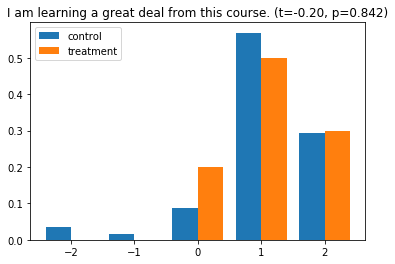

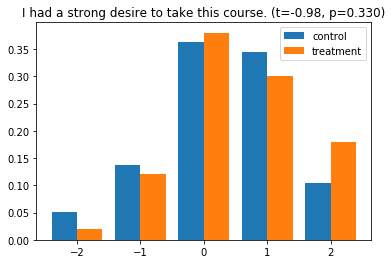

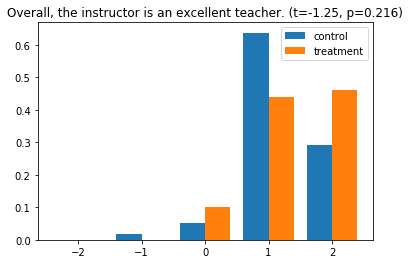

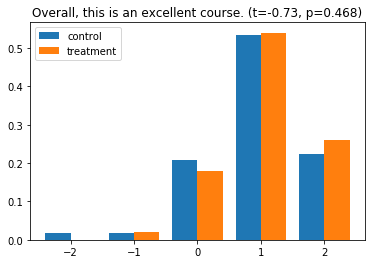

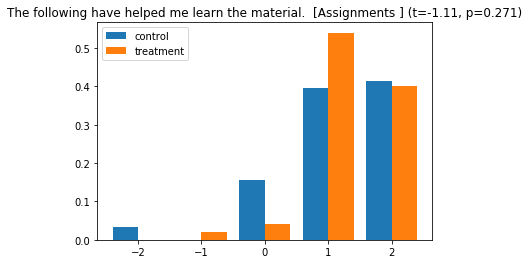

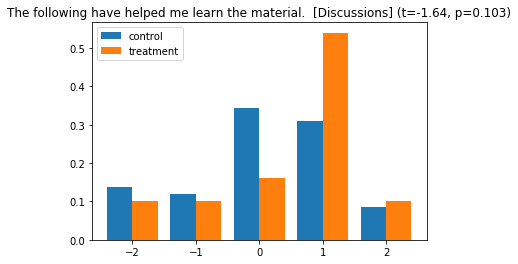

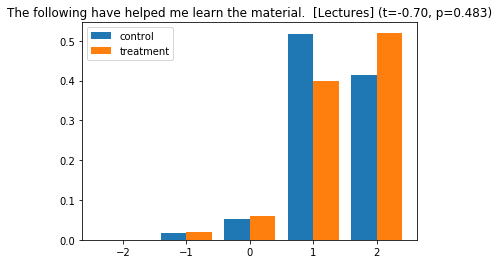

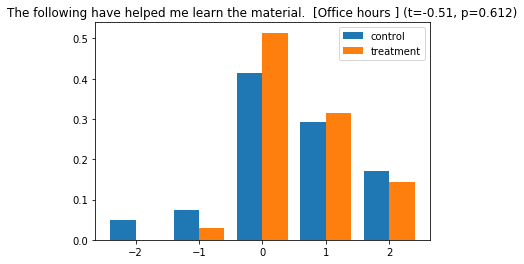

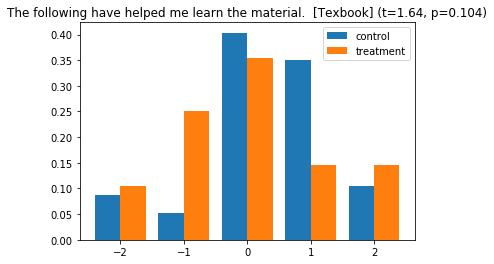

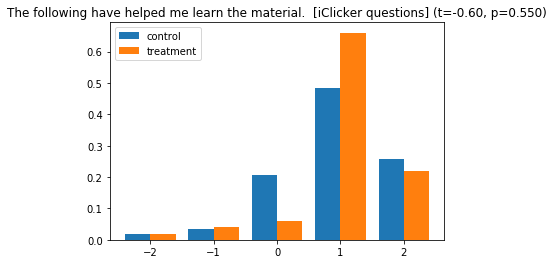

In [9]:
for c in columns:
    t, p = spstats.ttest_ind(df_con[c].dropna(), df_exp[c].dropna())
    plt.figure()
    plt.title("{} (t={:0.2f}, p={:0.3f})".format(c, t, p))
    data = [
        df_con[c].dropna(),
        df_exp[c].dropna()]
    plt.hist(data, bins=[-2.5, -1.5, -0.5, 0.5, 1.5, 2.5], label=['control', 'treatment'], normed=True)
    plt.legend()
    